Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты


##### Требуется выполнить следующее задание:

1. Загрузите файл HR.csv в pandas dataframe: 5  
2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение): 10  
3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные: 10  
4. Рассчитайте сколько сотрудников работает в каждом департаменте: 5  
5. Показать распределение сотрудников по зарплатам: 5  
6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности: 5  
7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом: 10  
8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности): 10  
    ● Доля сотрудников с повышением за последние 5 лет  
    ● Средняя степень удовлетворенности  
    ● Среднее количество проектов  
9. Разделить данные на тестовую и обучающую выборки.  
Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).  
Оценить качество модели на тестовой выборке: 20
10. Загрузить jupyter notebook с решение на github и прислать ссылку: 5  

Итого - максимум 85 баллов  
Для зачета необходимо набрать минимум 55


In [1]:
import pandas as pd
import numpy as np
import statistics
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score


In [2]:
# 1. Загружаем данные
data = pd.read_csv('HR.csv')
data.head(20)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
# 2. Вычисляем основные статистики для переменных
data.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
# Вычисляем медианы для количественных переменных
print('Medians:')
for col in data.columns.values[:5]:
    print(f'{col} median = {np.median(data[col])}')


Medians:
satisfaction_level median = 0.64
last_evaluation median = 0.72
number_project median = 4.0
average_montly_hours median = 200.0
time_spend_company median = 3.0


In [5]:
# Вычисляем моды для переменных
print('Modes:')
m0 = statistics.mode(data['satisfaction_level'].round(decimals=1))
m1 = statistics.mode(data['last_evaluation'].round(decimals=1))
m2 = statistics.mode(data['number_project'])
m3 = statistics.mode(data['average_montly_hours'].round(decimals=-1))
m4 = statistics.mode(data['time_spend_company'])
m5 = statistics.mode(data['Work_accident'])
m6 = statistics.mode(data['left'])
m7 = statistics.mode(data['promotion_last_5years'])
m8 = statistics.mode(data['department'])
m9 = statistics.mode(data['salary'])
print(f'satisfaction_level: {m0}')
print(f'last_evaluation: {m1}')
print(f'number_project: {m2}')
print(f'average_montly_hours: {m3}')
print(f'time_spend_company: {m4}')
print(f'Work_accident: {m5}')
print(f'left: {m6}')
print(f'promotion_last_5years: {m7}')
print(f'department: {m8}')
print(f'salary: {m9}')


Modes:
satisfaction_level: 0.8
last_evaluation: 0.6
number_project: 4
average_montly_hours: 140
time_spend_company: 3
Work_accident: 0
left: 0
promotion_last_5years: 0
department: sales
salary: low


In [6]:
# 3. Рассчитываем корреляционную матрицу для колчественных переменных
data_num = data[['satisfaction_level',
      'last_evaluation',
      'number_project',
      'average_montly_hours',
      'time_spend_company']]
corr = data_num.corr()
corr


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


Text(0.5, 1.1, 'Корреляция количественных переменных')

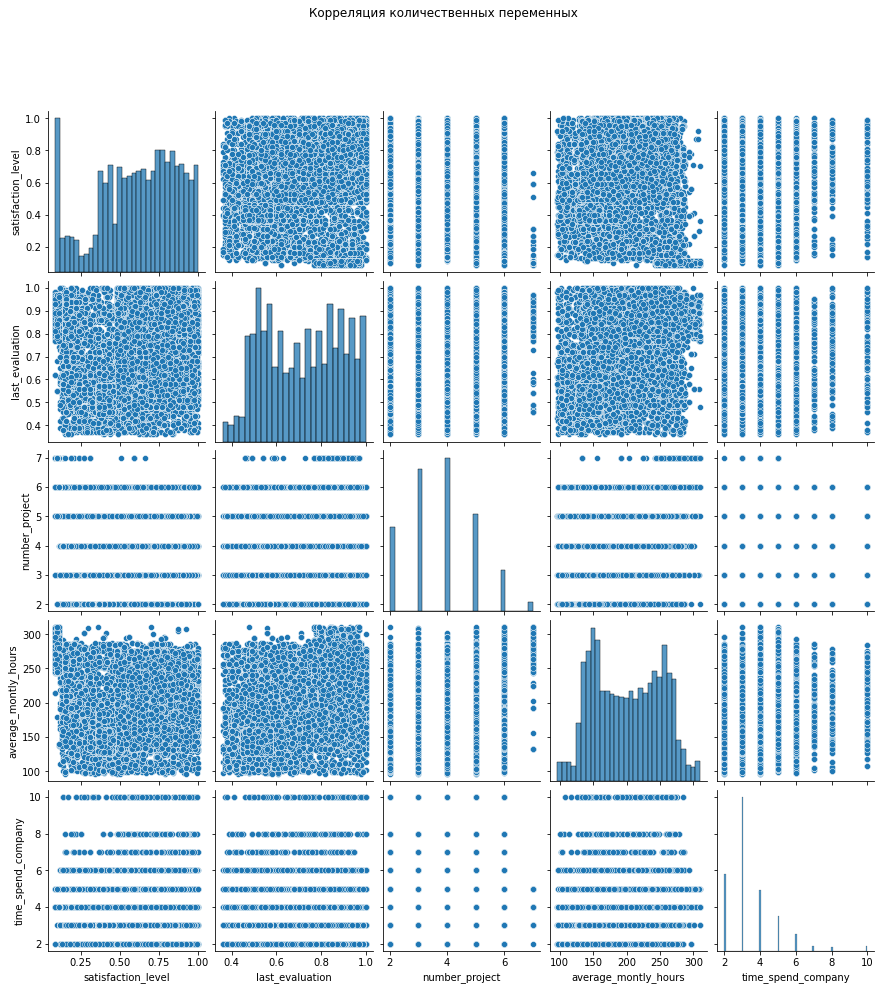

In [7]:
# Визуализируем отношения между переменными
p = sns.pairplot(data_num)
p.fig.suptitle('Корреляция количественных переменных', y=1.1)


Text(0.5, 1.0, 'Коэффициенты корреляции')

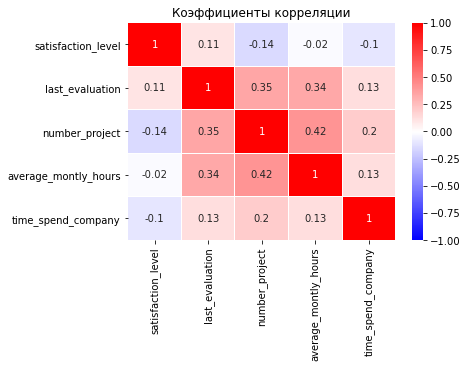

In [8]:
hmc = sns.heatmap(data=corr, annot=True, vmin=-1, vmax=1, cmap='bwr', linecolor='white', linewidths=0.01)
hmc.set_title('Коэффициенты корреляции')


In [9]:
# Самые скоррелированные переменные - количество завершенных проектов и среднее количество рабочих часов в месяц
# Наименее скоррелированные - уровень удовлетворенности и среднее количество рабочих часов.


In [10]:
# рассчитаем количество сотрудников в каждом департаменте
data[['department']].groupby(data['department']).size() \
                    .reset_index(name='count') \
                    .sort_values(['count'], ascending=False)


,department,count
7,sales,4140
9,technical,2720
8,support,2229
0,IT,1227
6,product_mng,902
5,marketing,858
1,RandD,787
2,accounting,767
3,hr,739
4,management,630


salary
high      1237
medium    6446
low       7316
dtype: int64


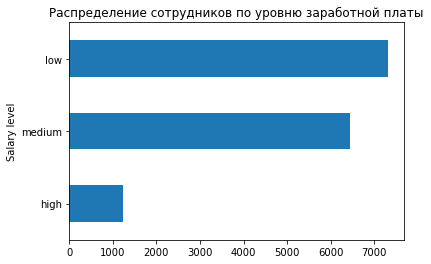

In [11]:
# Покажем распределение сотрудников по уровню зарплаты
salaries = data[['salary']].groupby(['salary'])\
.size().sort_values()
print(salaries)
salaries_ax = salaries.plot(kind='barh',
      title='Распределение сотрудников по уровню заработной платы',
      xlabel='Salary level',
      ylabel='Number of employees')


salary        low  medium  high
department                     
IT            609     535    83
RandD         364     372    51
accounting    358     335    74
hr            335     359    45
management    180     225   225
marketing     402     376    80
product_mng   451     383    68
sales        2099    1772   269
support      1146     942   141
technical    1372    1147   201


<AxesSubplot:ylabel='department'>

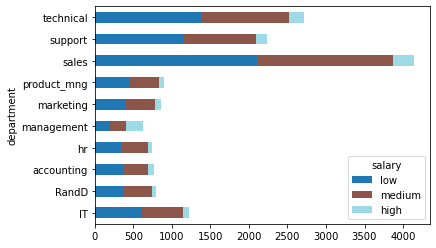

In [12]:
# Распределение сотрудников по уровню зарплаты в каждом департаменте
departments_salaries = data[['department', 'salary']] \
.groupby(['department', 'salary']).size()
departments_salaries = departments_salaries.unstack().reset_index() \
.set_index(['department'])[['low', 'medium', 'high']]
print(departments_salaries)
departments_salaries.plot(kind='barh', stacked=True, cmap='tab20')


In [13]:
#Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом: 10
#H0: Сотрудники с высоким окладом проводят на работе столько же времени, как и сотрудники с низким окладом
#H1: Количество времени, проводимого на работе сотрудниками с высоким окладом,
#    отличается от количества времени, проводимого на работе сотрудниками с низким окладом 


In [14]:
high_salaries = data[data.salary == 'high'][['average_montly_hours']]
low_salaries = data[data.salary == 'low'][['average_montly_hours']]


Text(0.5, 1.0, 'Working hours vs high salary')

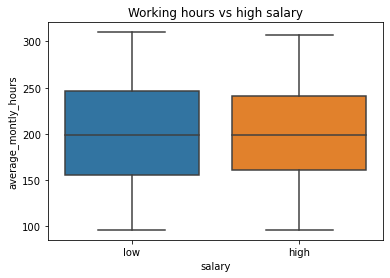

In [15]:
sh = sns.boxplot(x='salary', y='average_montly_hours', data=data[data.salary.isin(['high', 'low'])])
sh.set_title('Working hours vs high salary')


(array([ 5., 15., 11., 15., 10.,  4., 26., 40., 42., 41., 47., 40., 57.,
        39., 43., 53., 33., 30., 53., 25., 37., 48., 47., 28., 42., 41.,
        43., 33., 30., 51., 45., 41., 50., 37., 10.,  9., 13.,  0.,  1.,
         2.]),
 array([ 96.   , 101.275, 106.55 , 111.825, 117.1  , 122.375, 127.65 ,
        132.925, 138.2  , 143.475, 148.75 , 154.025, 159.3  , 164.575,
        169.85 , 175.125, 180.4  , 185.675, 190.95 , 196.225, 201.5  ,
        206.775, 212.05 , 217.325, 222.6  , 227.875, 233.15 , 238.425,
        243.7  , 248.975, 254.25 , 259.525, 264.8  , 270.075, 275.35 ,
        280.625, 285.9  , 291.175, 296.45 , 301.725, 307.   ]),
 <BarContainer object of 40 artists>)

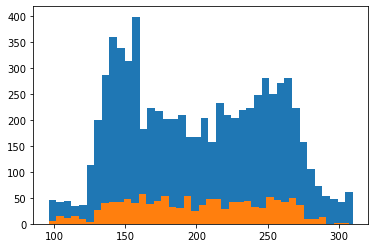

In [16]:
# для выбора теста проверим, как распределена количественная переменная.

plt.hist(low_salaries, bins=40)
plt.hist(high_salaries, bins=40)


In [17]:
# При таком распределении выборок t-криерий Стьюдента не подойдет для проеверки гипотезы.
# Используем для анализа определения занчимости критерий Манна-Уитни

In [18]:
alpha = 0.05
stats.mannwhitneyu(high_salaries, low_salaries)
statistic, pvalue = stats.mannwhitneyu(high_salaries, low_salaries)
print(f'statistic = {statistic}, p-value = {pvalue}')
if pvalue < alpha:
    print('На уровне значимости 5% отклоняем нулевую гипотезу')
    if(high_salaries['average_montly_hours'].mean() > 
       low_salaries['average_montly_hours'].mean()):
        print('Сотрудники с высоким окладом проводят на работе больше времени')
    else:
        print('Сотрудники с ybrbv окладом проводят на работе больше времени')
else:
    print('На уровне значимости 5% мы не можем отклонить нулевую гипотезу')


statistic = 4507096.5, p-value = 0.4120665360429347
На уровне значимости 5% мы не можем отклонить нулевую гипотезу


In [19]:
#Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
#    ● Доля сотрудников с повышением за последние 5 лет
#    ● Средняя степень удовлетворенности
#    ● Среднее количество проектов

In [20]:
# Доля сотрудников с повышением за последние 5 лет
def share_of_data(row):
    total = len(data[data['left'] == row['left']])
    return row['count'] / total


In [21]:
data_promotion = data[['left','promotion_last_5years']]. \
groupby(['left','promotion_last_5years']). \
size().reset_index(name='count')


In [22]:
data_promotion['share in group'] = data_promotion.apply(share_of_data, axis=1)
data_promotion


,left,promotion_last_5years,count,share in group
0,0,0,11128,0.973749
1,0,1,300,0.026251
2,1,0,3552,0.994679
3,1,1,19,0.005321


In [23]:
# Средняя степень удовлетворенности
data[['left','satisfaction_level']].groupby('left').agg('mean', 'satisfaction_level')


,satisfaction_level
left,
0,0.666810
1,0.440098


In [24]:
# Среднее количество проектов
data[['left','number_project']].groupby('left').agg('mean', 'number_project')


,number_project
left,
0,3.786664
1,3.855503


In [25]:
data.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [26]:
#Разделить данные на тестовую и обучающую выборки.  
#Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).  
#Оценить качество модели на тестовой выборке
data_x = data[['satisfaction_level',
               'last_evaluation',
               'number_project',
               'average_montly_hours',
               'time_spend_company',
               'Work_accident',
               'promotion_last_5years'
              ]]
data_y = data['left']


In [27]:
# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.25)


In [28]:
lda = LinearDiscriminantAnalysis()


In [29]:
# Обучаем модель
lda.fit(X_train, y_train)


LinearDiscriminantAnalysis()

In [30]:
# Делаем прогноз на тествой выборке
result = pd.DataFrame([lda.predict(X_test), y_test]).T
result.columns = ['Forecast', 'Fact']
result


,Forecast,Fact
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
3745,0,0
3746,0,0
3747,0,0
3748,0,0


In [31]:
lda.coef_


array([[-4.56013841e+00,  7.62703653e-01, -2.38625726e-01,
         4.17729929e-03,  2.27308416e-01, -1.04938510e+00,
        -1.16586377e+00]])

In [32]:
# Оценим качество модели на тестовой выборке
accuracy_score(y_test, lda.predict(X_test))


0.7554666666666666